In [2]:
import keras

In [3]:
import zipfile as zf
files = zf.ZipFile("input.zip", 'r')
files.extractall()
files.close()

In [4]:
import zipfile as zf
files = zf.ZipFile("output.zip", 'r')
files.extractall()
files.close()

In [5]:
import cv2
import numpy as np
import os
import keras
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

In [6]:
def prepare_data():
    x_train = []
    y_train = []
    x_test  = []
    y_test  = []
    for i in range(0,201):
        img_in = cv2.imread('input/'+str(i)+'.png')
        img_out = cv2.imread('output/'+str(i)+'.png')
        x_train.append(img_in)
        y_train.append(img_out)
    for i in range(201,221):
        img_in = cv2.imread('input/'+str(i)+'.png')
        img_out = cv2.imread('output/'+str(i)+'.png')
        x_test.append(img_in)
        y_test.append(img_out)
    x_train = np.array(x_train)
    y_train = np.array(y_train)
    x_test = np.array(x_test)
    y_test = np.array(y_test)
    return x_train,y_train,x_test,y_test

In [7]:
x_train,y_train,x_test,y_test = prepare_data()

In [8]:
print(x_train.shape)

(201, 240, 240, 3)


In [9]:
model = keras.models.Sequential()

In [10]:
model.add(keras.layers.BatchNormalization(input_shape=x_train.shape[1:]))


In [11]:
model.add(keras.layers.Conv2D(8, (3, 3), padding='same', strides=(1,1), activation = 'relu'))
model.add(keras.layers.Conv2D(16, (3, 3), padding='same', strides=(1,1), activation = 'relu'))
model.add(keras.layers.MaxPool2D(2))

model.add(keras.layers.Conv2D(16, (3, 3), padding='same', strides=(1,1), activation = 'relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Conv2D(32, (3, 3), padding='same', strides=(1,1), activation = 'relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.MaxPool2D(2))

model.add(keras.layers.Conv2D(64, (3, 3), padding='same', strides=(1,1), activation = 'relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Conv2D(64, (3, 3), padding='same', strides=(1,1), activation = 'relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.MaxPool2D(2))

model.add(keras.layers.Conv2D(64, (3, 3), padding='same', strides=(1,1), activation = 'relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Conv2D(64, (3, 3), padding='same', strides=(1,1), activation = 'relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.MaxPool2D(2))

In [12]:
model.add(keras.layers.UpSampling2D(size=(2,2)))
model.add(keras.layers.Conv2DTranspose(64, (3, 3), padding='same', strides=(1,1), activation = 'relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Conv2DTranspose(64, (3, 3), padding='same', strides=(1,1), activation = 'relu'))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.UpSampling2D(size=(2,2)))
model.add(keras.layers.Conv2DTranspose(32, (3, 3), padding='same', strides=(1,1), activation = 'relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Conv2DTranspose(32, (3, 3), padding='same', strides=(1,1), activation = 'relu'))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.UpSampling2D(size=(2,2)))
model.add(keras.layers.Conv2DTranspose(16, (3, 3), padding='same', strides=(1,1), activation = 'relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Conv2DTranspose(16, (3, 3), padding='same', strides=(1,1), activation = 'relu'))

model.add(keras.layers.UpSampling2D(size=(2,2)))
model.add(keras.layers.Conv2DTranspose(16, (3, 3), padding='same', strides=(1,1), activation = 'relu'))
model.add(keras.layers.Conv2DTranspose(1, (3, 3), padding='same', strides=(1,1), activation = 'relu'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 240, 240, 3)       12        
_________________________________________________________________
conv2d (Conv2D)              (None, 240, 240, 8)       224       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 240, 240, 16)      1168      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 120, 120, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 120, 120, 16)      2320      
_________________________________________________________________
dropout (Dropout)            (None, 120, 120, 16)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 120, 120, 32)      4

In [14]:
model.compile(optimizer='Adam', loss='mean_squared_error' , metrics=['accuracy'])

In [15]:
model.fit(x_train,y_train,epochs=20,batch_size=32,validation_split=0.2)

Epoch 1/20
5/5 [==============================] - 37s 7s/step - loss: 492.6742 - accuracy: 0.5422 - val_loss: 456.7571 - val_accuracy: 0.0516
Epoch 2/20
5/5 [==============================] - 36s 7s/step - loss: 489.8747 - accuracy: 0.3646 - val_loss: 458.5283 - val_accuracy: 0.0044
Epoch 3/20
5/5 [==============================] - 36s 7s/step - loss: 483.7925 - accuracy: 0.1349 - val_loss: 443.6208 - val_accuracy: 0.0381
Epoch 4/20
5/5 [==============================] - 36s 7s/step - loss: 464.1679 - accuracy: 0.1686 - val_loss: 420.0112 - val_accuracy: 0.4934
Epoch 5/20
5/5 [==============================] - 37s 7s/step - loss: 438.3000 - accuracy: 0.5849 - val_loss: 394.7194 - val_accuracy: 0.8478
Epoch 6/20
5/5 [==============================] - 37s 7s/step - loss: 419.1970 - accuracy: 0.7999 - val_loss: 402.2126 - val_accuracy: 0.9225
Epoch 7/20
5/5 [==============================] - 36s 7s/step - loss: 411.1029 - accuracy: 0.8618 - val_loss: 396.2552 - val_accuracy: 0.9363
Epoch 

In [16]:
model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 2ms/step - loss: 400.3090 - accuracy: 0.9479


[400.30902099609375, 0.9478578567504883]

In [17]:
model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 1ms/step - loss: 400.3090 - accuracy: 0.9479


[400.30902099609375, 0.9478578567504883]

In [18]:
model.save('UNetModel.h5');

In [19]:
model = keras.models.load_model('UNetModel.h5')

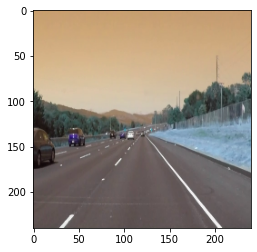

In [52]:
import matplotlib.pyplot as plt
test = cv2.imread('input/'+str(100)+'.png')
testin = []
testin.append(test)
testin = np.asarray(testin)
plt.imshow(testin[0])

In [53]:
out = model.predict(testin)

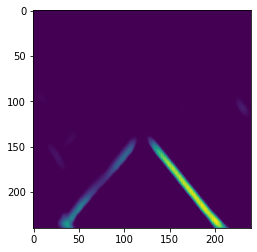

In [54]:
plt.imshow(out.squeeze())